🔹 Shape: (3000, 5)
🔹 Columns: Index(['Unnamed: 0', 'book_id', 'book_name', 'genre', 'summary'], dtype='object')
🔹 Null values:
 Unnamed: 0    0
book_id       0
book_name     0
genre         0
summary       0
dtype: int64

🔹 Sample rows:
    Unnamed: 0   book_id                  book_name    genre  \
0           0   3248537          Drowned Wednesday  Fantasy   
1           1  27796919              The Lost Hero  Fantasy   
2           2   3910776  The Eyes of the Overworld  Fantasy   
3           3   5969644            Magic's Promise  Fantasy   
4           4   3173445             Taran Wanderer  Fantasy   

                                             summary  
0   Drowned Wednesday is the first Trustee among ...  
1   As the book opens, Jason awakens on a school ...  
2   Cugel is easily persuaded by the merchant Fia...  
3   The book opens with Herald-Mage Vanyel return...  
4   Taran and Gurgi have returned to Caer Dallben...  

🔹 Genre distribution:
 genre
Fantasy             500

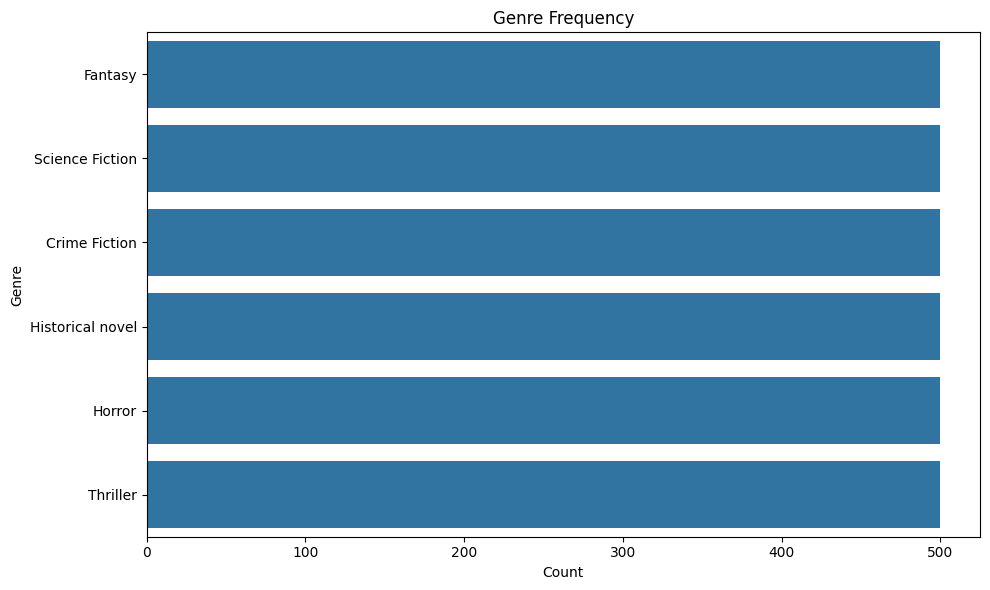


🔸 MODEL: Logistic Regression 🔸
✅ Accuracy: 0.72
✅ Classification Report:
                   precision    recall  f1-score   support

   Crime Fiction       0.71      0.82      0.76        96
         Fantasy       0.74      0.71      0.73       118
Historical novel       0.73      0.81      0.77       101
          Horror       0.77      0.60      0.68        91
 Science Fiction       0.74      0.80      0.77        99
        Thriller       0.64      0.57      0.60        95

        accuracy                           0.72       600
       macro avg       0.72      0.72      0.72       600
    weighted avg       0.72      0.72      0.72       600



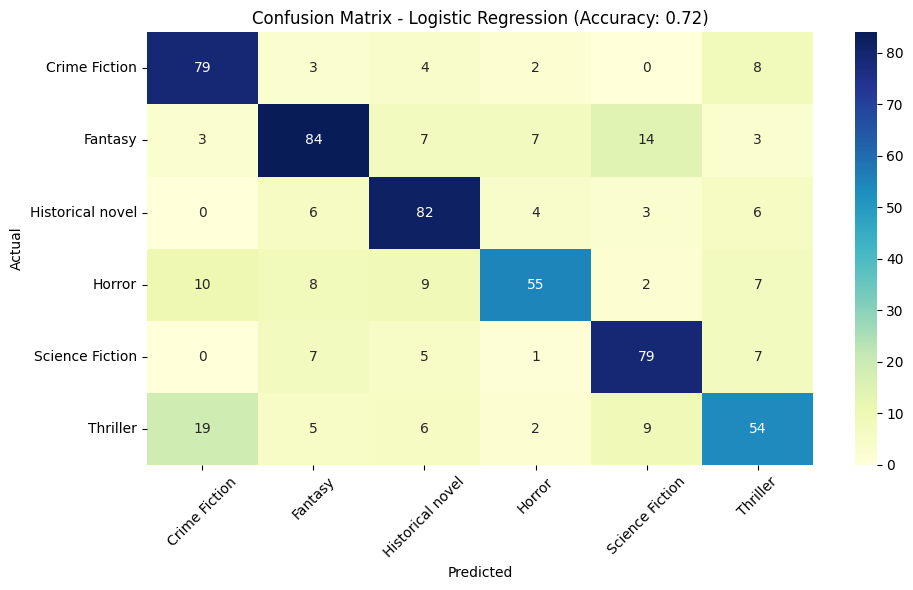


🔸 MODEL: Decision Tree 🔸
✅ Accuracy: 0.46
✅ Classification Report:
                   precision    recall  f1-score   support

   Crime Fiction       0.51      0.57      0.54        96
         Fantasy       0.45      0.48      0.47       118
Historical novel       0.49      0.46      0.47       101
          Horror       0.46      0.43      0.45        91
 Science Fiction       0.48      0.52      0.50        99
        Thriller       0.34      0.29      0.31        95

        accuracy                           0.46       600
       macro avg       0.46      0.46      0.46       600
    weighted avg       0.46      0.46      0.46       600



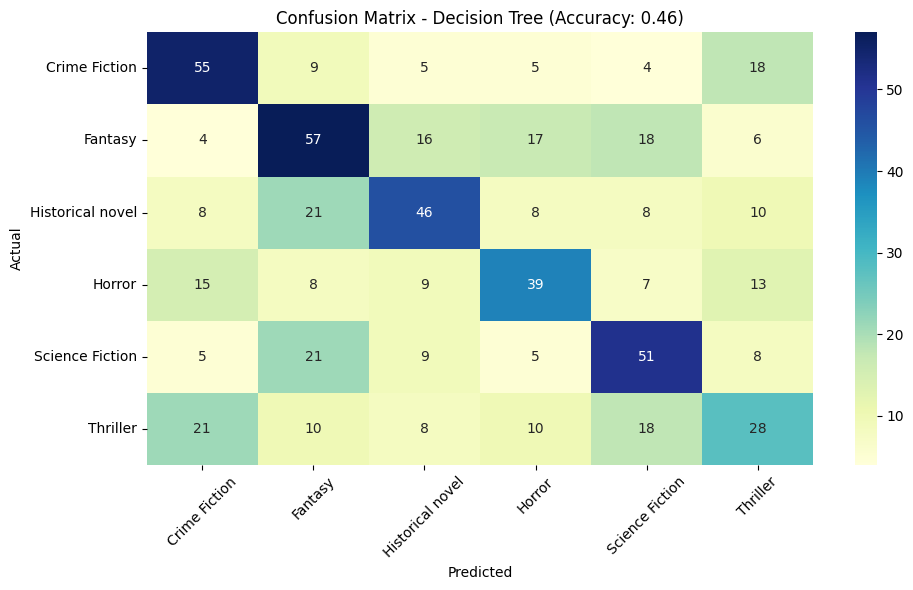


🔸 MODEL: Random Forest 🔸
✅ Accuracy: 0.63
✅ Classification Report:
                   precision    recall  f1-score   support

   Crime Fiction       0.62      0.80      0.70        96
         Fantasy       0.63      0.63      0.63       118
Historical novel       0.60      0.80      0.69       101
          Horror       0.69      0.46      0.55        91
 Science Fiction       0.64      0.70      0.67        99
        Thriller       0.64      0.37      0.47        95

        accuracy                           0.63       600
       macro avg       0.64      0.63      0.62       600
    weighted avg       0.64      0.63      0.62       600



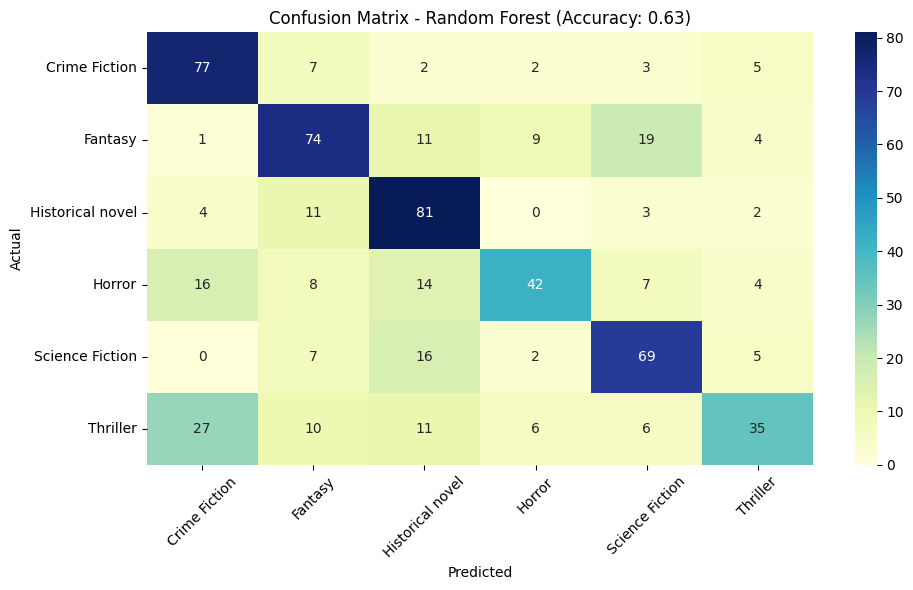

In [ ]:
# STEP 1: IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# STEP 2: LOAD DATA
df = pd.read_csv("BooksData.csv")

# STEP 3: EXPLORE DATA (EDA)
print("🔹 Shape:", df.shape)
print("🔹 Columns:", df.columns)
print("🔹 Null values:\n", df.isnull().sum())
print("\n🔹 Sample rows:\n", df.head())

# STEP 4: CLEANING
df = df[['summary', 'genre']].dropna()   # 👈 Using summary instead of book_name
df = df[df['genre'] != '']  # remove empty genre rows

# Check distribution
print("\n🔹 Genre distribution:\n", df['genre'].value_counts())

# STEP 5: VISUALIZATIONS
plt.figure(figsize=(10,6))
sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index)
plt.title("Genre Frequency")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

# STEP 6: FEATURE & TARGET
X = df['summary']     # 👈 Using 'summary' as feature
y = df['genre']

# STEP 7: TEXT VECTORIZATION
tfidf = TfidfVectorizer(max_features=10000, stop_words='english', ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(X)

# STEP 8: SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# STEP 9: MODELS TO TRAIN
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# STEP 10: TRAIN & EVALUATE
for name, model in models.items():
    print(f"\n🔸 MODEL: {name} 🔸")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {acc:.2f}")
    print("✅ Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    plt.figure(figsize=(10,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix - {name} (Accuracy: {acc:.2f})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [1]:
import csv
books = pd.read_csv('BooksData.csv', quoting=3, on_bad_lines='skip')

NameError: name 'pd' is not defined

In [ ]:
#displaying the books dataframe
print("Snapshot of books dataframe")
books

In [ ]:
# Count of books per genre
genre_counts = books['genre'].value_counts()
print(genre_counts)

df = df[['summary', 'genre']]
#removing empty genre rows
df = df[df['genre'] != '']
print("Genre distribution:\n", df['genre'].value_counts())

genre
 now Duke of the Border Sea                                                                                                                                                                               1
 or the other story where he is set adrift to Avalon where his wounds may be healed that he might rule again."                                                                                            1
 Grover travels trying to spread the message of Pan                                                                                                                                                       1
 to see his father - Arthur - and to conspire against him. Arthur's downfall is set in motion."                                                                                                           1
 ensuring that nature is protected from mankind's excesses."                                                                                                                      

Text(0, 0.5, 'Count')

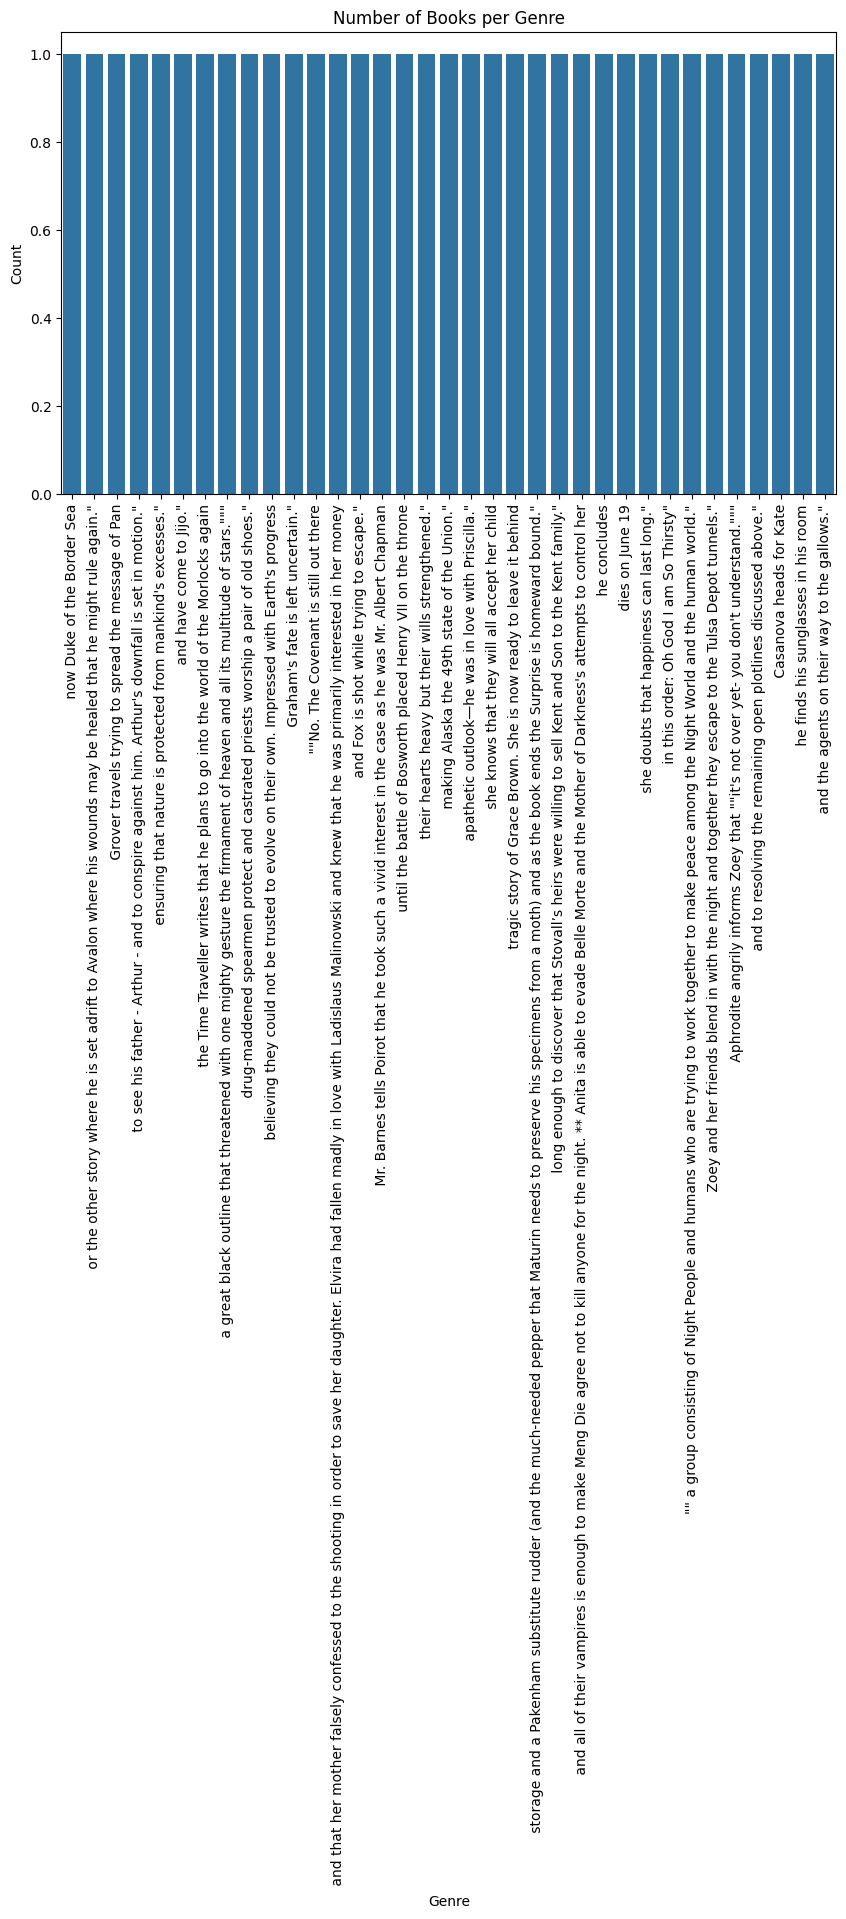

In [ ]:
# Plotting Genre Distribution
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=90)
plt.title("Number of Books per Genre")
plt.xlabel("Genre")
plt.ylabel("Count")

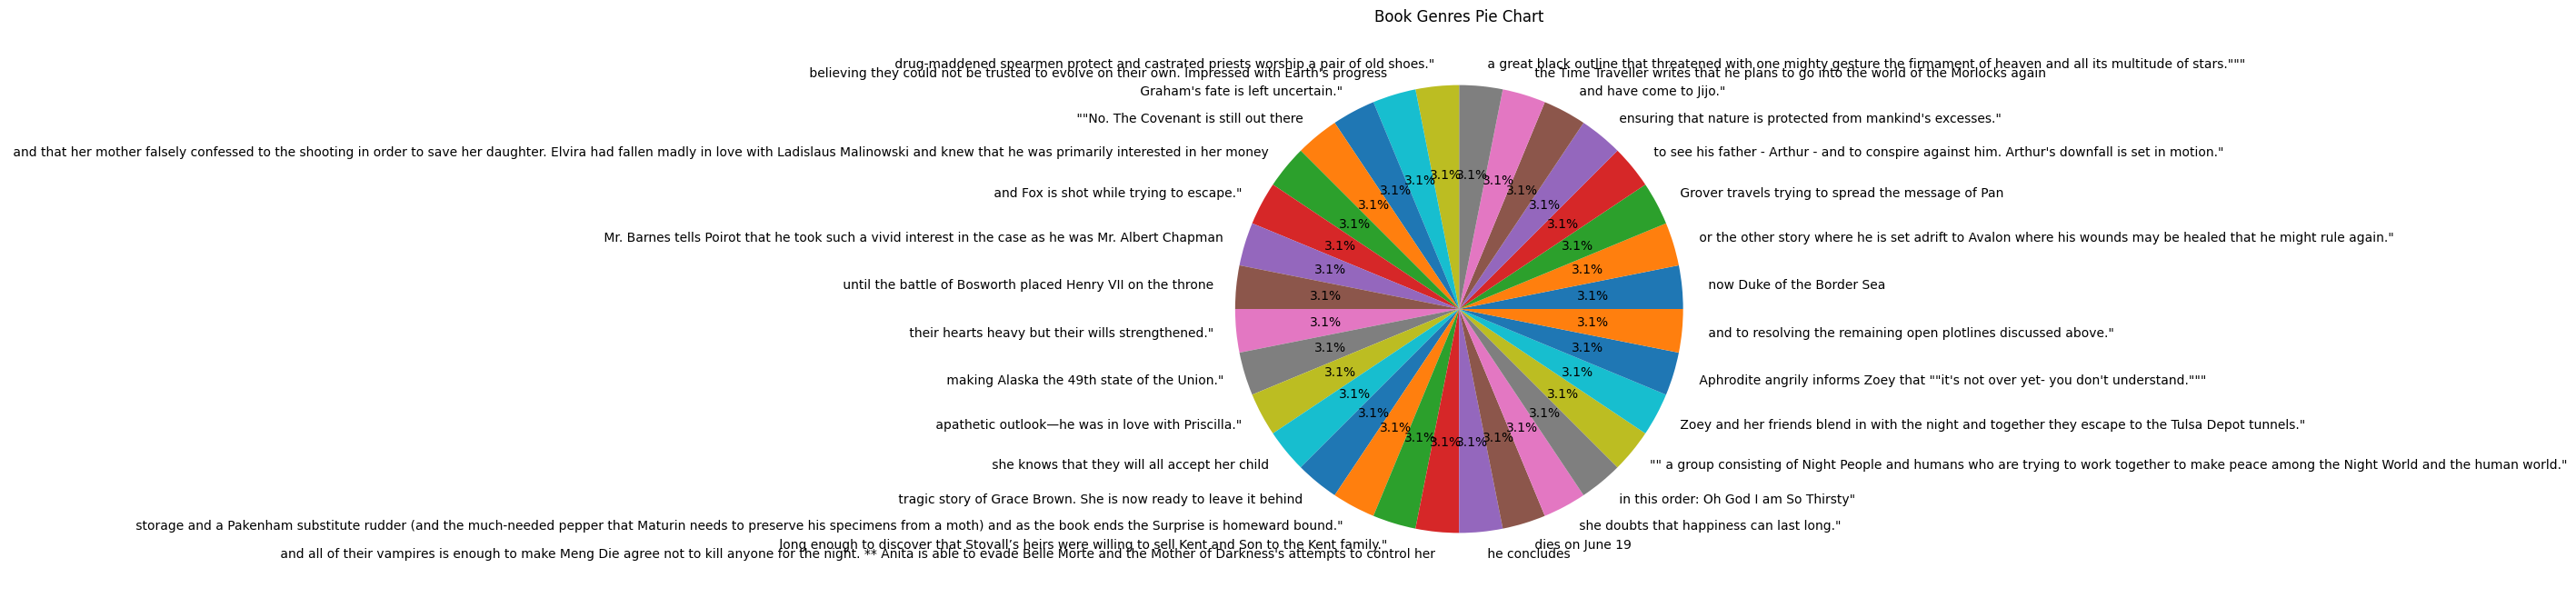

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.title("Book Genres Pie Chart")
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

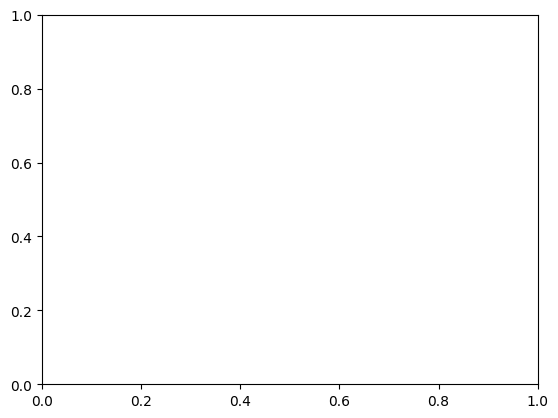

In [ ]:
plt.scatter(books['book_id'],books['genre'])
plt.show()

In [ ]:
fig = px.scatter_3d(books,x='book_id',y='book_name',z='genre')
fig.show()

In [ ]:
print(books.isnull().sum())

Unnamed: 0    2197
book_id       2209
book_name     2223
genre         2234
summary       2253
dtype: int64


Implementing Logistic Regression

In [ ]:
# Drop rows with missing values in either 'summary' or 'genre'
books_cleaned = books.dropna(subset=['summary', 'genre']).copy()

X = books_cleaned['summary']
y = books_cleaned['genre']

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

Accuracy: 0.0
                                                                                              precision    recall  f1-score   support

 believing they could not be trusted to evolve on their own. Impressed with Earth's progress       0.00      0.00      0.00       0.0
                                                                                he concludes       0.00      0.00      0.00       1.0
                                                                  now Duke of the Border Sea       0.00      0.00      0.00       1.0
          the Time Traveller writes that he plans to go into the world of the Morlocks again       0.00      0.00      0.00       0.0
                            tragic story of Grace Brown. She is now ready to leave it behind       0.00      0.00      0.00       1.0

                                                                                    accuracy                           0.00       3.0
                                              

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-p

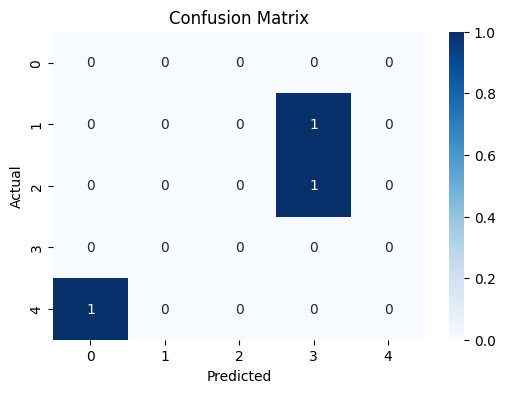

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Implementing Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Dataset
books = pd.read_csv('BooksDataSet1.csv', quoting=3, on_bad_lines='skip')

# Step 2: Feature and Target
X = books['book_name']
y = books['genre']

# Step 3: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Step 5: Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Step 6: Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Classification Report:\n", classification_report(y_test, y_pred))

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix - Random Forest (All Genres)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'BooksDataSet1.csv'

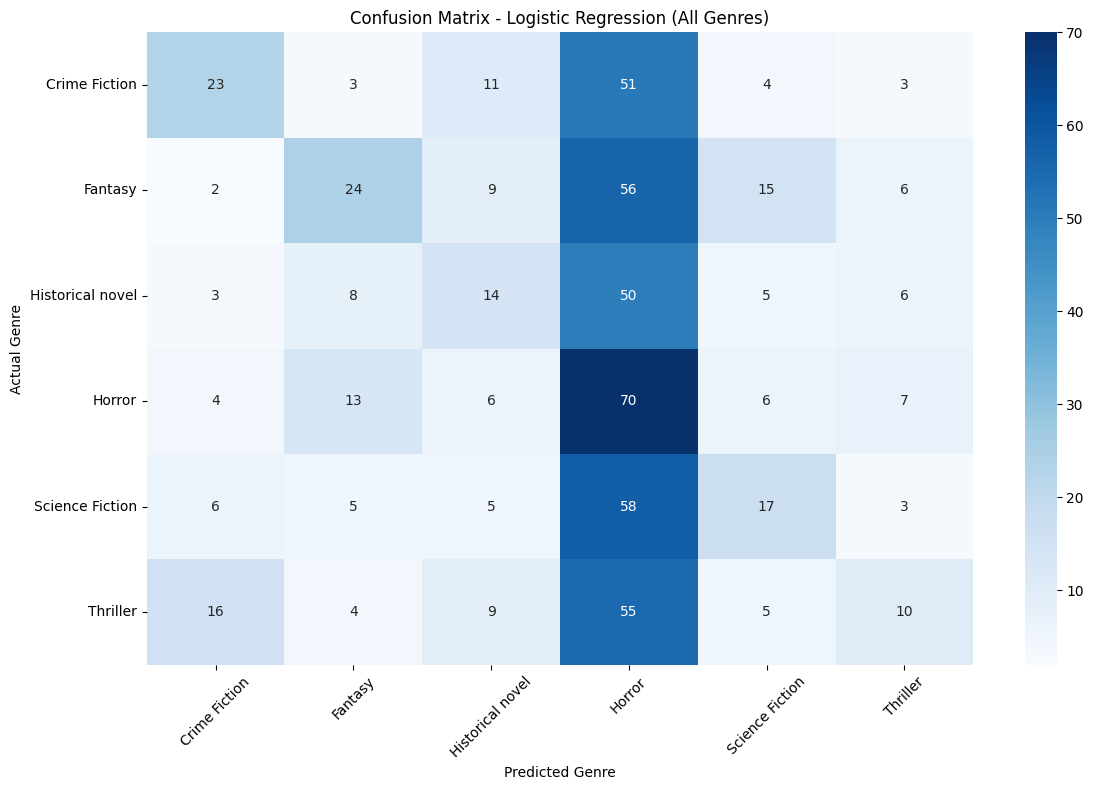

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# After fitting your Logistic Regression model and predicting y_pred

# Generate confusion matrix with proper label alignment
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plotting the Confusion Matrix
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)

plt.title("Confusion Matrix - Logistic Regression (All Genres)")
plt.xlabel("Predicted Genre")
plt.ylabel("Actual Genre")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
print(books['genre'].unique())

[' now Duke of the Border Sea' nan
 ' or the other story where he is set adrift to Avalon where his wounds may be healed that he might rule again."'
 ' Grover travels trying to spread the message of Pan'
 ' to see his father - Arthur - and to conspire against him. Arthur\'s downfall is set in motion."'
 ' ensuring that nature is protected from mankind\'s excesses."'
 ' and have come to Jijo."'
 ' the Time Traveller writes that he plans to go into the world of the Morlocks again'
 ' a great black outline that threatened with one mighty gesture the firmament of heaven and all its multitude of stars."""'
 ' drug-maddened spearmen protect and castrated priests worship a pair of old shoes."'
 " believing they could not be trusted to evolve on their own. Impressed with Earth's progress"
 ' Graham\'s fate is left uncertain."'
 ' ""No. The Covenant is still out there'
 ' and that her mother falsely confessed to the shooting in order to save her daughter. Elvira had fallen madly in love with La

Unique genres after cleaning:
[' now Duke of the Border Sea'
 ' or the other story where he is set adrift to Avalon where his wounds may be healed that he might rule again."'
 ' Grover travels trying to spread the message of Pan'
 ' to see his father - Arthur - and to conspire against him. Arthur\'s downfall is set in motion."'
 ' ensuring that nature is protected from mankind\'s excesses."'
 ' and have come to Jijo."']


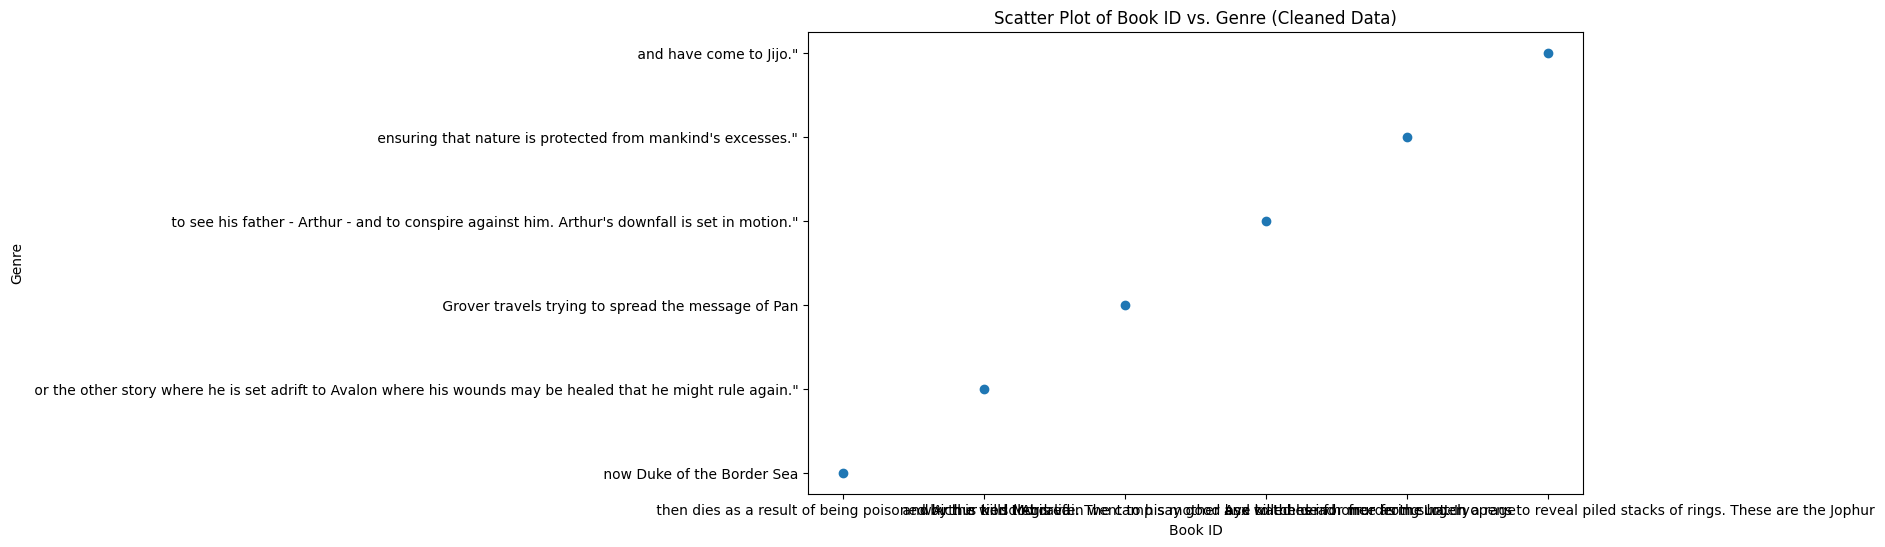

In [ ]:
# Identify common genres based on frequency
common_genres = books['genre'].value_counts().nlargest(6).index.tolist()

# Filter the DataFrame to keep only rows with common genres
books_cleaned = books[books['genre'].isin(common_genres)].copy()

# Verify the unique genres in the cleaned DataFrame
print("Unique genres after cleaning:")
print(books_cleaned['genre'].unique())

# Now attempt to create the scatter plot with the cleaned data
plt.figure(figsize=(10, 6))
plt.scatter(books_cleaned['book_id'], books_cleaned['genre'])
plt.title("Scatter Plot of Book ID vs. Genre (Cleaned Data)")
plt.xlabel("Book ID")
plt.ylabel("Genre")
plt.show()